In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from catboost import CatBoostClassifier, Pool, cv


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


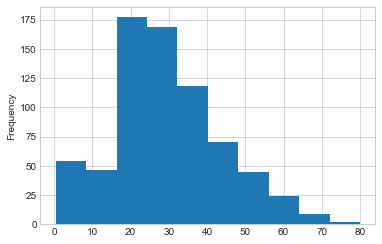

In [4]:
train.Age.plot.hist()

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


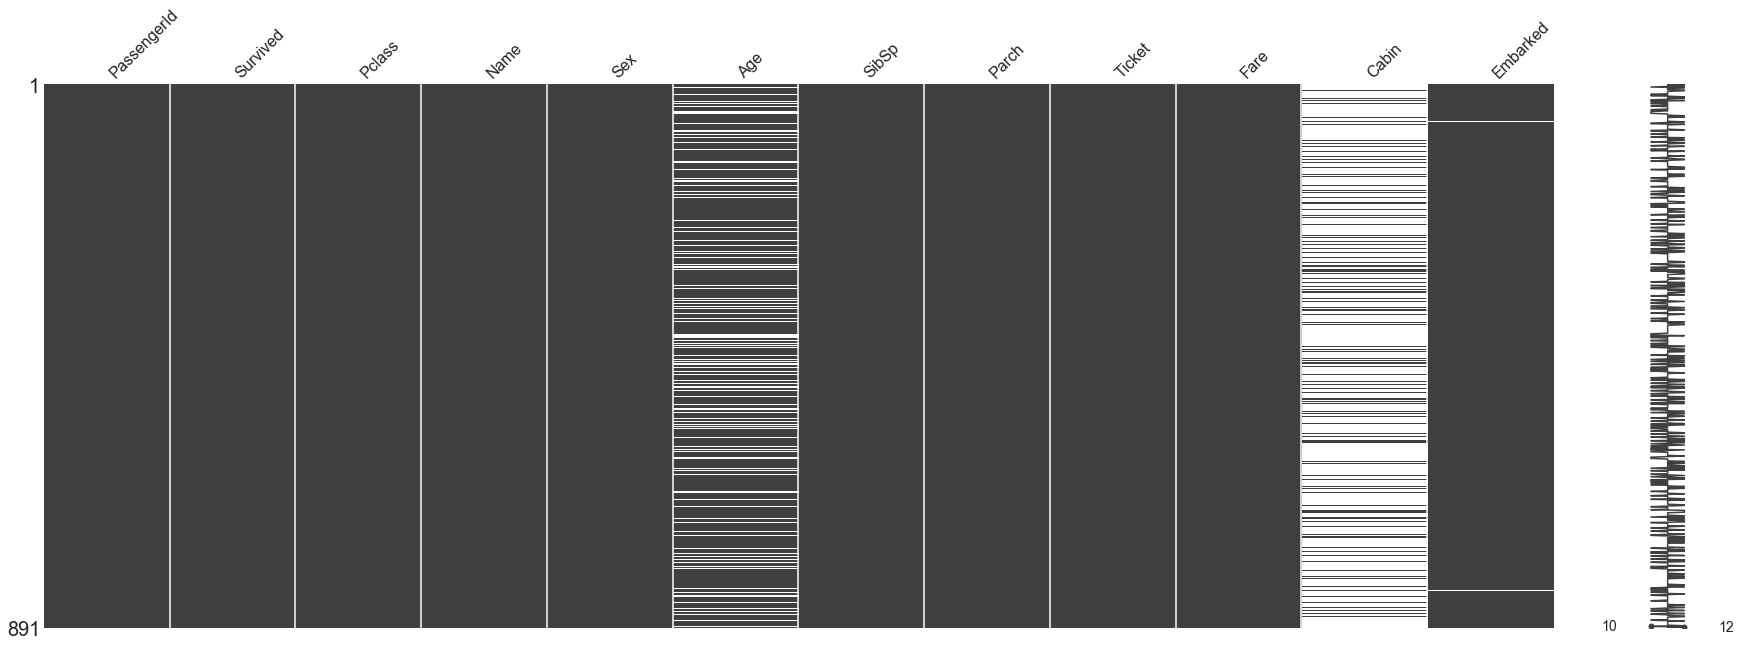

In [8]:
missingno.matrix(train,figsize=(30,10))

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


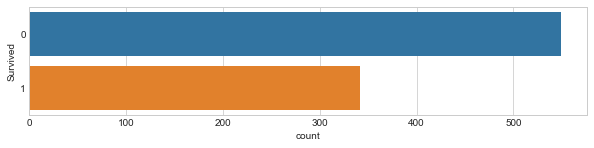

In [13]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [14]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [15]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


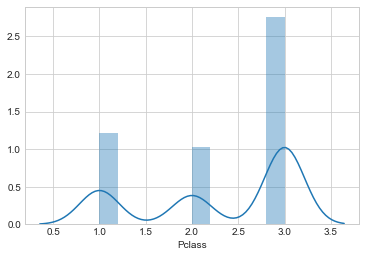

In [17]:
sns.distplot(train.Pclass)

In [18]:
train.Pclass.isnull().sum()

0

In [19]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

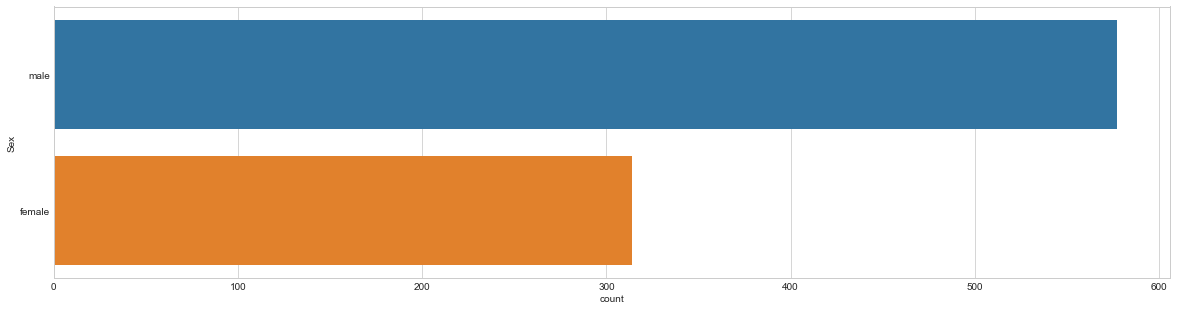

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sex",data=train)

In [21]:
train.Sex.isnull().sum()

0

In [22]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [23]:
df_bin['Sex'] = train['Sex']

In [24]:
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)

In [25]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


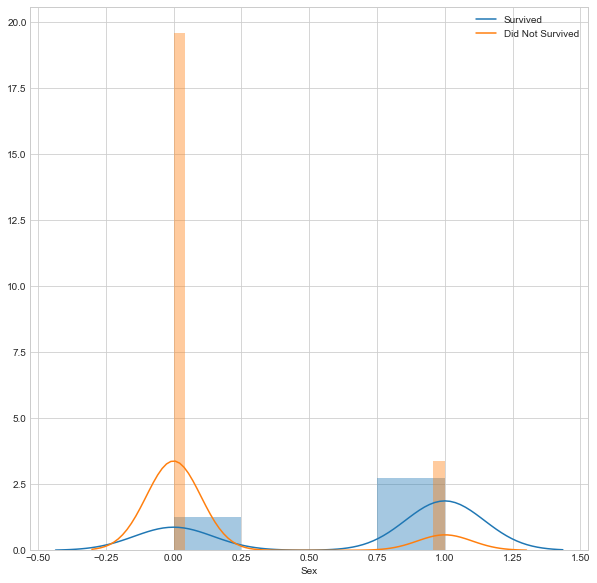

In [26]:
fig = plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'Did Not Survived'});

In [27]:
train.Age.isnull().sum()

177

In [28]:
train.Age.head(15)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
#survived
df_bin.Survived.where(df_bin['Survived']==1).count()

342

In [31]:
#not survived
df_bin.Survived.where(df_bin['Survived']==0).count()

549

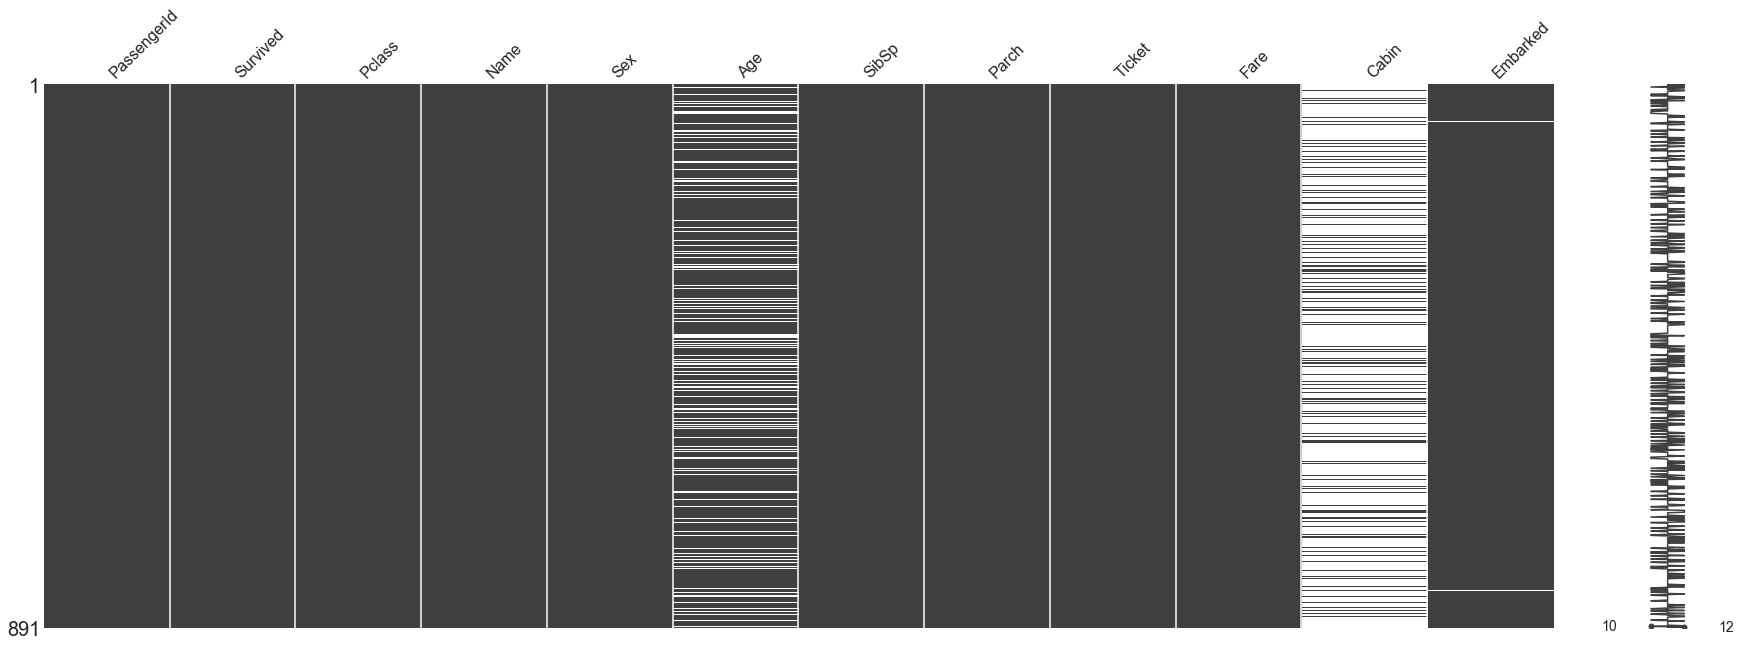

In [32]:
missingno.matrix(train,figsize=(30,10))

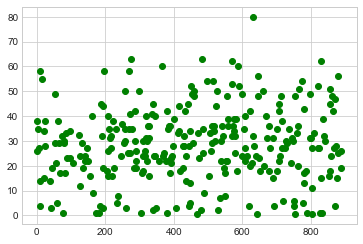

In [33]:
plt.plot(train.Age.where(train.Survived==1),'o', color='green')

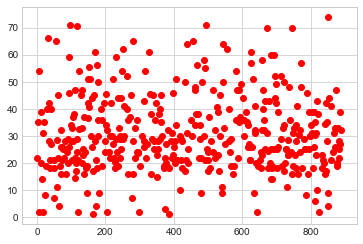

In [34]:
plt.plot(train.Age.where(train.Survived==0),'o', color='red')

In [35]:
train.where(train.Age>30).Age

0       NaN
1      38.0
2       NaN
3      35.0
4      35.0
       ... 
886     NaN
887     NaN
888     NaN
889     NaN
890    32.0
Name: Age, Length: 891, dtype: float64

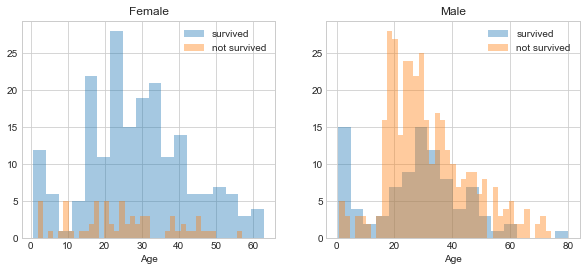

In [36]:
survived='survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,
        ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=not_survived,
        ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
_=ax.set_title('Male')


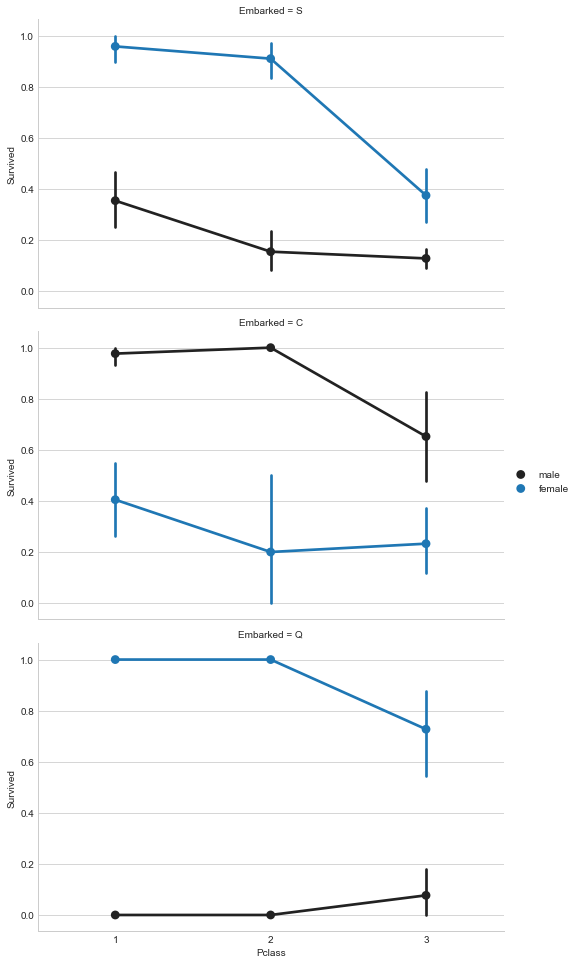

In [37]:
FacetGrid = sns.FacetGrid(train,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

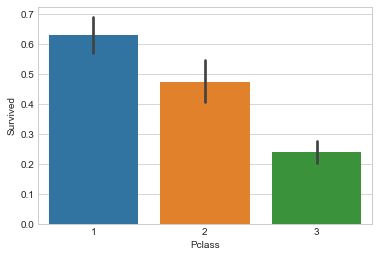

In [38]:
sns.barplot(x='Pclass',y='Survived',data=train)

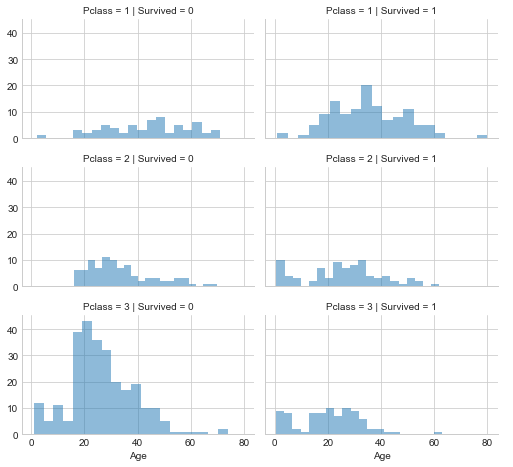

In [39]:
grid = sns.FacetGrid(train,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [40]:
data=[train,test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone']= 0
    dataset.loc[dataset['relatives']==0,'not_alone']= 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

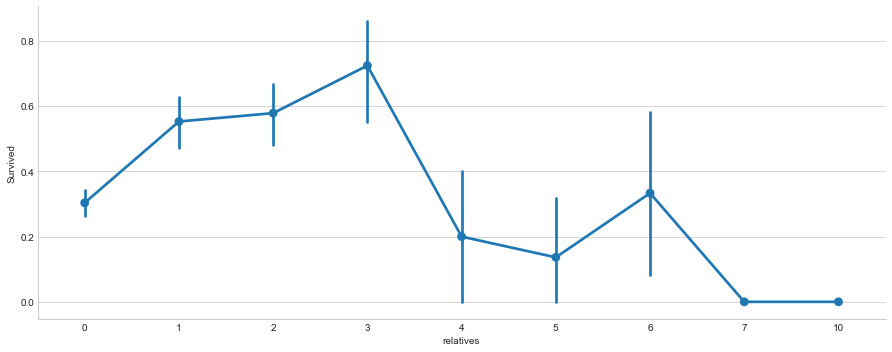

In [41]:
axis = sns.factorplot('relatives','Survived',data=train,aspect=2.5)

In [42]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z+])").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] =  dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)


In [43]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
relatives      891
not_alone      891
Deck           891
dtype: int64

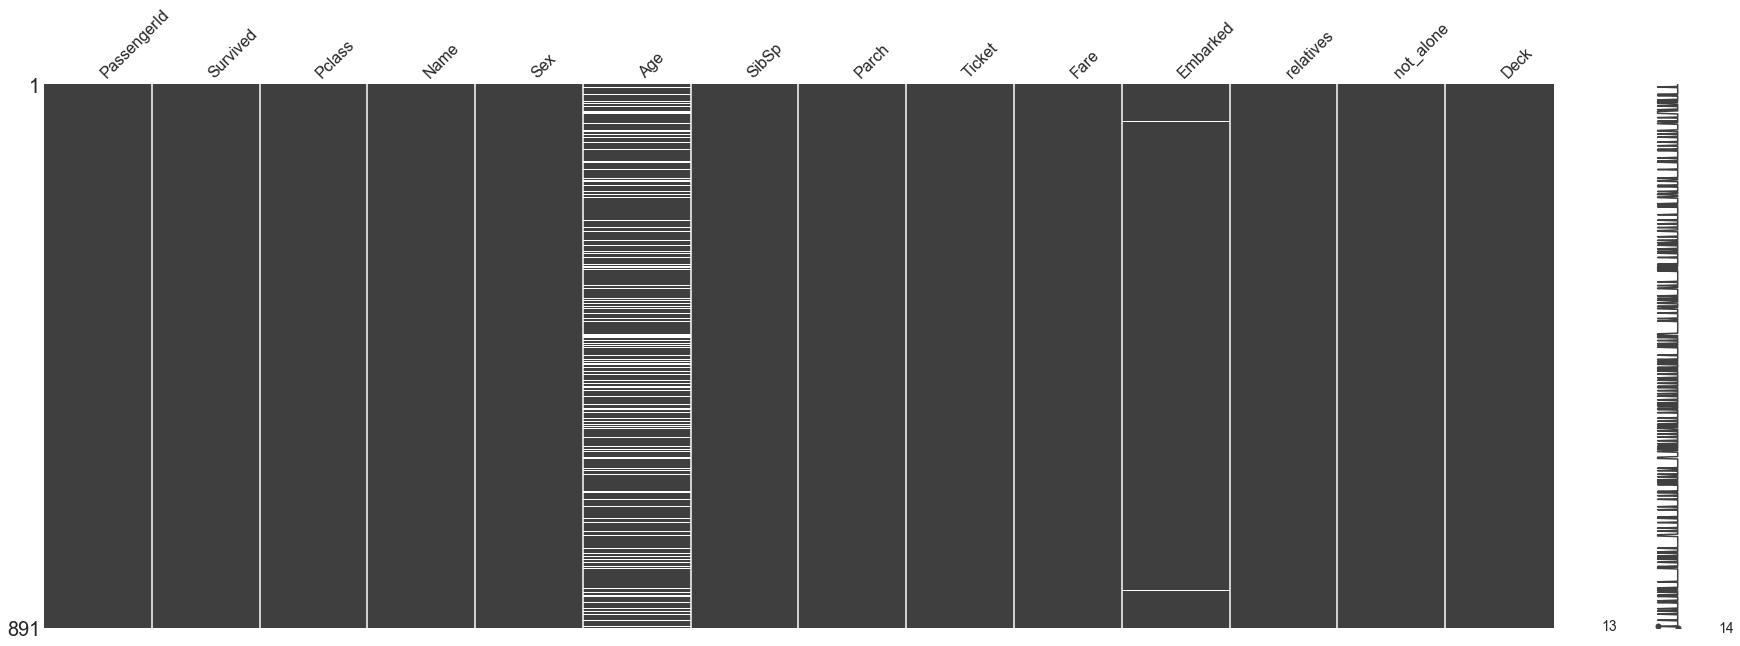

In [44]:
missingno.matrix(train,figsize=(30,10))

In [45]:
data = [train,test]
for dataset in data:
    mean = train['Age'].mean()
    std = train['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train['Age'].astype(int)
train['Age'].isnull().sum()
    

0

In [46]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [47]:
common_value = 'S'
data=[train,test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

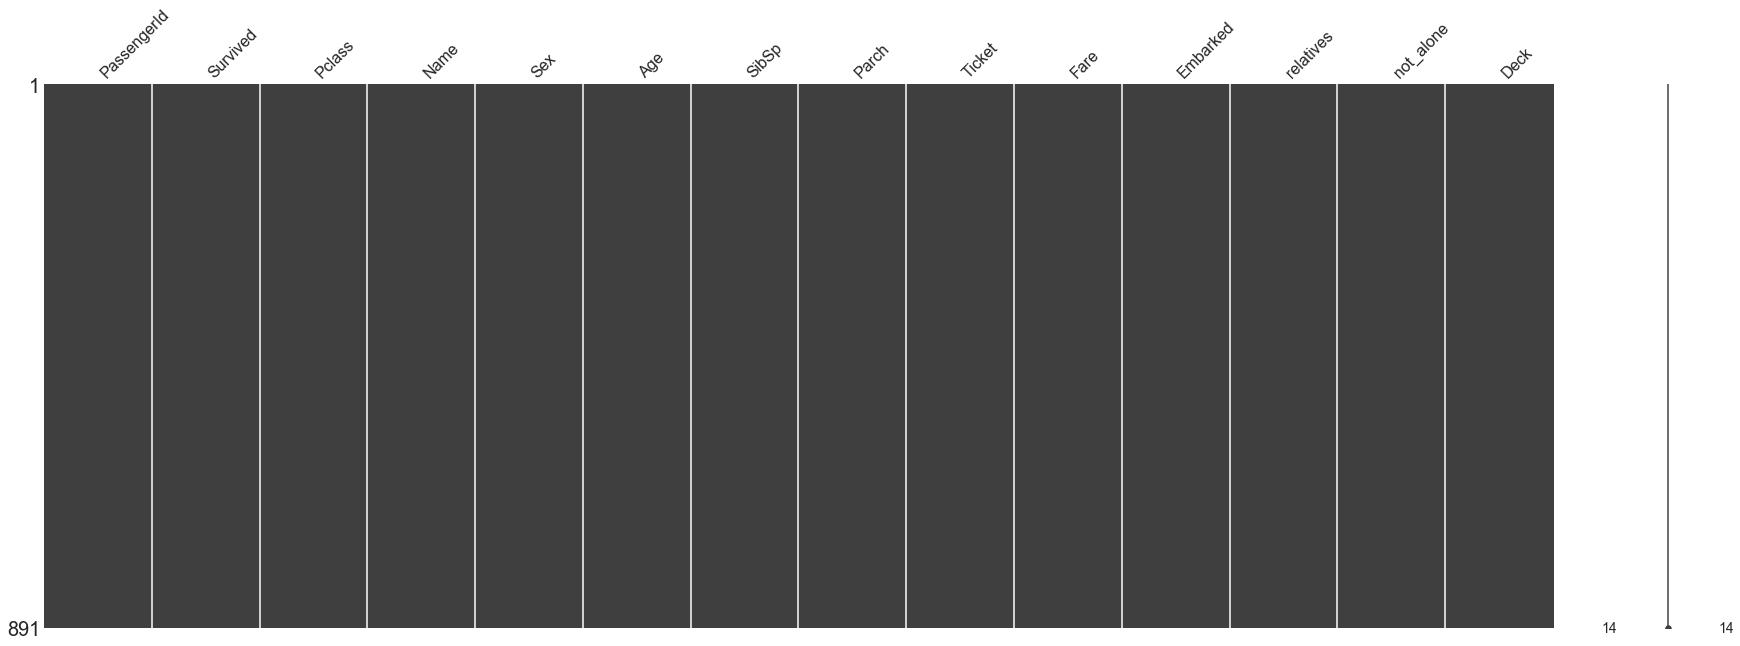

In [48]:
missingno.matrix(train,figsize=(30,10))

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 87.1+ KB


In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,8


In [51]:
data = [train,test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,8


In [53]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1
1,2,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,3,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,4,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,5,0,3,male,35,0,0,373450,8,S,0,1,8,1


In [55]:
genders={"male":0,"female":1}
data=[train,test]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1
1,2,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,3,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,4,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,5,0,3,0,35,0,0,373450,8,S,0,1,8,1


In [57]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [58]:
train = train.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)

In [59]:
ports={"S":0,"C":1,"Q":2}
data = [train,test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,0,22,1,0,7,0,1,0,8,1
1,2,1,1,1,38,1,0,71,1,1,0,3,3
2,3,1,3,1,26,0,0,7,0,0,1,8,2
3,4,1,1,1,35,1,0,53,0,1,0,3,3
4,5,0,3,0,35,0,0,8,0,0,1,8,1


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int32
Embarked       891 non-null int64
relatives      891 non-null int64
not_alone      891 non-null int32
Deck           891 non-null int32
Title          891 non-null int64
dtypes: int32(4), int64(9)
memory usage: 76.7 KB


In [62]:
data = [train,test]
for dataset in data:
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66),'Age']=6
    dataset.loc[(dataset['Age']>66),'Age']=6
    

In [63]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 14), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


In [64]:
data=[train,test]
for dataset in data:
    dataset['Age_Class'] = dataset['Age']*dataset['Pclass']

In [65]:
for dataset in data:
    dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [66]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,8,1,6,0
1,893,3,1,5,1,0,0,0,1,0,8,3,15,0
2,894,2,0,3,0,0,1,2,0,1,8,1,6,1
3,895,3,0,5,0,0,1,0,0,1,8,1,15,1
4,896,3,1,5,1,1,1,0,2,0,8,3,15,0


In [67]:
train = train.drop(['PassengerId'], axis=1)

In [68]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


In [69]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId",axis=1).copy()

In [70]:
sgd = linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(X_train,Y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train,Y_train)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)

In [71]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)


In [72]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train,Y_train)*100,2)

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train)*100,2)

In [74]:
gaussion = GaussianNB()
gaussion.fit(X_train,Y_train)
Y_pred = gaussion.predict(X_test)
acc_gaussian = round(gaussion.score(X_train,Y_train)*100,2)

In [75]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)

In [76]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100,2)

In [77]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train,Y_train)*100,2)

In [78]:
results = pd.DataFrame({
    'Model':['SVM','KNN','Logistic Regression','Random Forest','Naive Bayes',
            'Perceptron','Stochastic Gradient Decent',
            'Decision Tree'],
    'Score':[acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
results_df = results.sort_values(by='Score',ascending=False)
results_df = results_df.set_index('Score')
results_df.head(9)

,Model
Score,
92.70,Random Forest
92.70,Decision Tree
85.86,KNN
82.04,Perceptron
81.82,Logistic Regression
81.71,SVM
81.03,Stochastic Gradient Decent
78.11,Naive Bayes


In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,X_train,Y_train,cv=10,scoring="accuracy")
print("scores:",scores)
print("Mean:",scores.mean())
print("Standrard Deviation:",scores.std())

scores: [0.76666667 0.83333333 0.78651685 0.85393258 0.87640449 0.83146067
 0.80898876 0.7752809  0.86516854 0.85227273]
Mean: 0.8250025536261492
Standrard Deviation: 0.036824032060366114


In [87]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})

In [88]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [89]:
importances.head(15)

,importance
feature,
Sex,0.191
Title,0.179
Age_Class,0.101
Deck,0.086
Age,0.078
Pclass,0.077
Fare,0.064
Embarked,0.055
relatives,0.054


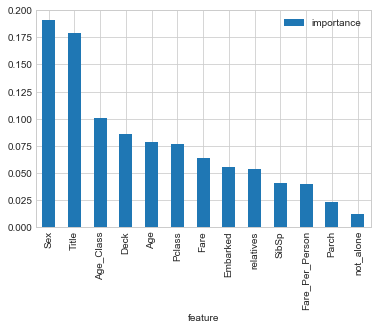

In [90]:
importances.plot.bar()

In [97]:
train = train.drop("not_alone",axis=1)
test  = test.drop("not_alone",axis=1)

train = train.drop("Parch",axis=1)
test = test.drop("Parch",axis=1)

KeyError: "['not_alone'] not found in axis"

In [100]:
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(X_train,Y_train)
Y_prediction= random_forest.predict(X_test)

random_forest.score(X_train,Y_train)

acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
print(round(acc_random_forest,2),"%")
print("oob score:",round(random_forest.oob_score_,4)*100,"%")

92.7 %
oob score: 82.94 %


In [104]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(X_train,Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train,Y_train)
print("oob score:",round(random_forest.oob_score_,4)*100,"%")

oob score: 83.61 %


In [105]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest,X_train,Y_train,cv=3)
confusion_matrix(Y_train,predictions)

array([[494,  55],
       [ 93, 249]], dtype=int64)

In [106]:
from sklearn.metrics import precision_score,recall_score

print("Precision:",precision_score(Y_train,predictions))
print("Recall:",recall_score(Y_train,predictions))

Precision: 0.819078947368421
Recall: 0.7280701754385965


In [107]:
from sklearn.metrics import f1_score
f1_score(Y_train,predictions)

0.7708978328173375

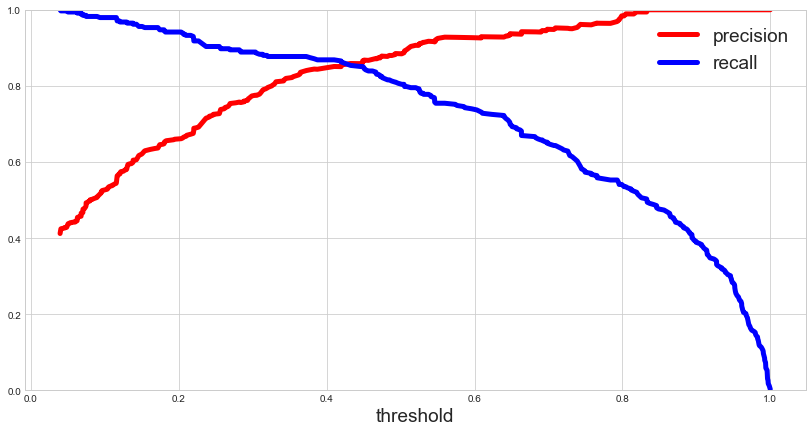

In [110]:
from sklearn.metrics import precision_recall_curve

Y_scores = random_forest.predict_proba(X_train)
Y_scores = Y_scores[:,1]

precision,recall,threshold = precision_recall_curve(Y_train,Y_scores)

def plot_precision_and_recall(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"r-",label="precision",linewidth=5)
    plt.plot(threshold,recall[:-1],"b",label="recall",linewidth=5)
    plt.xlabel("threshold",fontsize=19)
    plt.legend(loc="upper right",fontsize=19)
    plt.ylim([0,1])

plt.figure(figsize=(14,7))
plot_precision_and_recall(precision,recall,threshold)
plt.show()


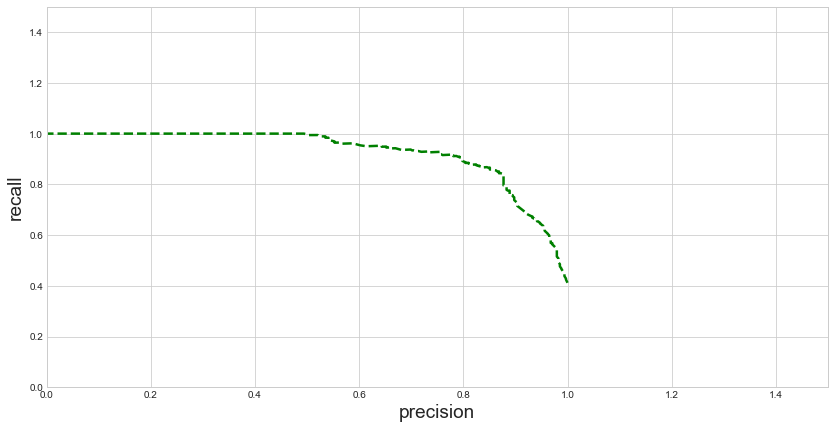

In [111]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

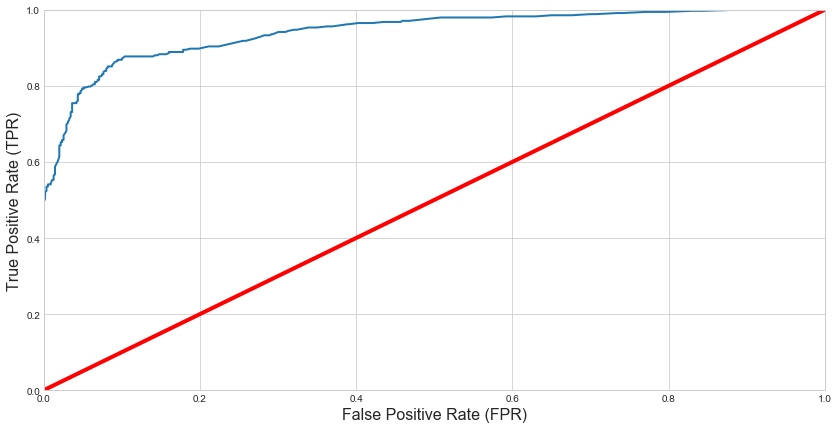

In [113]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, Y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9420370902970845
